<a href="https://colab.research.google.com/github/m4arce/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

In [5]:
# En este primer análisis, debes calcular el ingreso total de cada tienda.
# Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

ingresos = {}

for nombre, df in tiendas.items():
    ingresos[nombre] = df['Precio'].sum()

df_ingresos = pd.DataFrame.from_dict(ingresos, orient='index', columns=['Ingreso Total'])

df_ingresos['Ingreso Formateado'] = df_ingresos['Ingreso Total'].apply(lambda x: f"${x:,.0f}")

print("Ingresos totales por tienda:\n")
for tienda, row in df_ingresos.iterrows():
    print(f"{tienda}: {row['Ingreso Formateado']}")


Ingresos totales por tienda:

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


# 2. Ventas por categoría

##Cantidad de productos vendidos por categoría por tienda

In [6]:
#En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
#La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo,
# mostrando las categorías más populares de cada tienda.

categorias_por_tienda = {}


for nombre, df in tiendas.items():
    categorias = df.groupby('Categoría del Producto').size().sort_values(ascending=False)
    categorias_por_tienda[nombre] = categorias

    print(f"\nCategorías más vendidas en {nombre}:")
    print(categorias.to_string())


df_categorias = pd.DataFrame(categorias_por_tienda).fillna(0).astype(int).T



Categorías más vendidas en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171

Categorías más vendidas en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181

Categorías más vendidas en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177

Categorías más vendidas en Tienda 4:
Categoría del Producto
Muebles     

##Top 3 cantidad de productos vendidos por tienda

In [7]:
top_categorias_por_tienda = {}

for nombre, df in tiendas.items():
    top_3 = df['Categoría del Producto'].value_counts().head(3)
    top_categorias_por_tienda[nombre] = top_3

    print(f"\nTop 3 Categorias más vendidas en {nombre}:")
    print(top_3.to_string())

# Convertir en DataFrame (categorías como columnas, tiendas como filas)
df_top_categorias = pd.DataFrame(top_categorias_por_tienda).fillna(0).astype(int).T



Top 3 Categorias más vendidas en Tienda 1:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324

Top 3 Categorias más vendidas en Tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313

Top 3 Categorias más vendidas en Tienda 3:
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315

Top 3 Categorias más vendidas en Tienda 4:
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338


# 3. Calificación promedio de la tienda


##Calificación Promedio por tienda

In [8]:
#En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
#El objetivo es conocer la satisfacción del cliente con los productos vendidos.

calificaciones = {}

for nombre, df in tiendas.items():
    promedio = df['Calificación'].mean()
    calificaciones[nombre] = promedio

df_calificaciones = pd.DataFrame.from_dict(calificaciones, orient='index', columns=['Calificación Promedio'])

df_calificaciones = df_calificaciones.round(2)

print(df_calificaciones)



          Calificación Promedio
Tienda 1                   3.98
Tienda 2                   4.04
Tienda 3                   4.05
Tienda 4                   4.00


##Producto mejor valorado por tienda

In [9]:
productos_mejor_valorados = []


for nombre, df in tiendas.items():
    promedio_por_producto = df.groupby('Producto')['Calificación'].mean()
    mejor_producto = promedio_por_producto.sort_values(ascending=False).head(1)

    producto = mejor_producto.index[0]
    calificacion = round(mejor_producto.iloc[0], 2)

    productos_mejor_valorados.append({
        'Tienda': nombre,
        'Producto': mejor_producto.index[0],
        'Calificación Promedio': round(mejor_producto.values[0], 2)
    })

    print(f"\nProducto mejor valorado en {nombre}:")
    print(f"Producto: {producto}")
    print(f"Calificación promedio: {calificacion}")


df_mejor_valorados = pd.DataFrame(productos_mejor_valorados)





Producto mejor valorado en Tienda 1:
Producto: Ajedrez de madera
Calificación promedio: 4.43

Producto mejor valorado en Tienda 2:
Producto: Bicicleta
Calificación promedio: 4.53

Producto mejor valorado en Tienda 3:
Producto: Juego de mesa
Calificación promedio: 4.54

Producto mejor valorado en Tienda 4:
Producto: Batería
Calificación promedio: 4.33


# 4. Productos más y menos vendidos

In [10]:
# En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda.
# Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

for nombre, df in tiendas.items():
    ventas_por_producto = df['Producto'].value_counts()

    mas_vendido = ventas_por_producto.idxmax()
    menos_vendido = ventas_por_producto.idxmin()

    print(f"\n En {nombre}:")
    print(f"Producto más vendido: {mas_vendido} ({ventas_por_producto.max()} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({ventas_por_producto.min()} ventas)")


 En Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

 En Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

 En Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

 En Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


In [11]:
productos_mas = []
productos_menos = []

for nombre, df in tiendas.items():
    ventas_por_producto = df['Producto'].value_counts()

    productos_mas.append({
        'Tienda': nombre,
        'Producto': ventas_por_producto.idxmax(),
        'Ventas': ventas_por_producto.max()
    })

    productos_menos.append({
        'Tienda': nombre,
        'Producto': ventas_por_producto.idxmin(),
        'Ventas': ventas_por_producto.min()
    })

df_mas = pd.DataFrame(productos_mas)
df_menos = pd.DataFrame(productos_menos)

print("Productos más vendidos:")
print(df_mas.to_string(index=False))

print("\nProductos menos vendidos:")
print(df_menos.to_string(index=False))

Productos más vendidos:
  Tienda                  Producto  Ventas
Tienda 1                Microondas      60
Tienda 2 Iniciando en programación      65
Tienda 3             Kit de bancas      57
Tienda 4                  Cama box      62

Productos menos vendidos:
  Tienda                  Producto  Ventas
Tienda 1 Auriculares con micrófono      33
Tienda 2             Juego de mesa      32
Tienda 3   Bloques de construcción      35
Tienda 4        Guitarra eléctrica      33


# 5. Envío promedio por tienda

In [12]:
#En este paso, debes calcular el costo de envío promedio para cada tienda.
#El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

costos_envio = {}

for nombre, df in tiendas.items():
    promedio_envio = df['Costo de envío'].mean()
    costos_envio[nombre] = promedio_envio

df_envio = pd.DataFrame.from_dict(costos_envio, orient='index', columns=['Costo de Envío Promedio'])

df_envio['Formateado'] = df_envio['Costo de Envío Promedio'].apply(lambda x: f"${x:,.0f}")

print("Costo de envío promedio por tienda:\n")
for tienda, row in df_envio.iterrows():
    print(f"{tienda}: {row['Formateado']}")


Costo de envío promedio por tienda:

Tienda 1: $26,019
Tienda 2: $25,216
Tienda 3: $24,806
Tienda 4: $23,459


#**Dashboard - Alura Store**

##Métrica: Ingresos por tienda

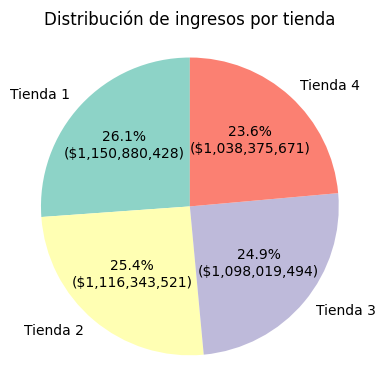

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(
    df_ingresos['Ingreso Total'],
    labels=df_ingresos.index,
    autopct=lambda p: f'{p:.1f}%\n(${int(p * df_ingresos["Ingreso Total"].sum() / 100):,})',
    startangle=90,
    colors=plt.cm.Set3.colors
)

plt.title('Distribución de ingresos por tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()



###Observación: Distribución de ingresos por tienda

El gráfico circular muestra la participación relativa de cada tienda en el ingreso total generado.

- **Tienda 1** representa la mayor proporción de ingresos con un **26.1%**, equivalente a **$1,150,880,428**, lo que la posiciona como la tienda con mejor rendimiento en términos de venta.
- Le siguen **Tienda 2** con **25.4%** y **Tienda 3** con **24.9%**, ambas con niveles de ingreso similares.
- Finalmente, **Tienda 4** tiene la menor participación con un **23.6%**, lo que podría indicar un menor volumen de ventas o menor ticket promedio.

Esta distribución sugiere que, si el objetivo es optimizar recursos o desinvertir, **Tienda 4 podría ser candidata a revisión más profunda**, ya que su aporte al total es el más bajo.

##Métrica: Ventas por tienda por Categoría

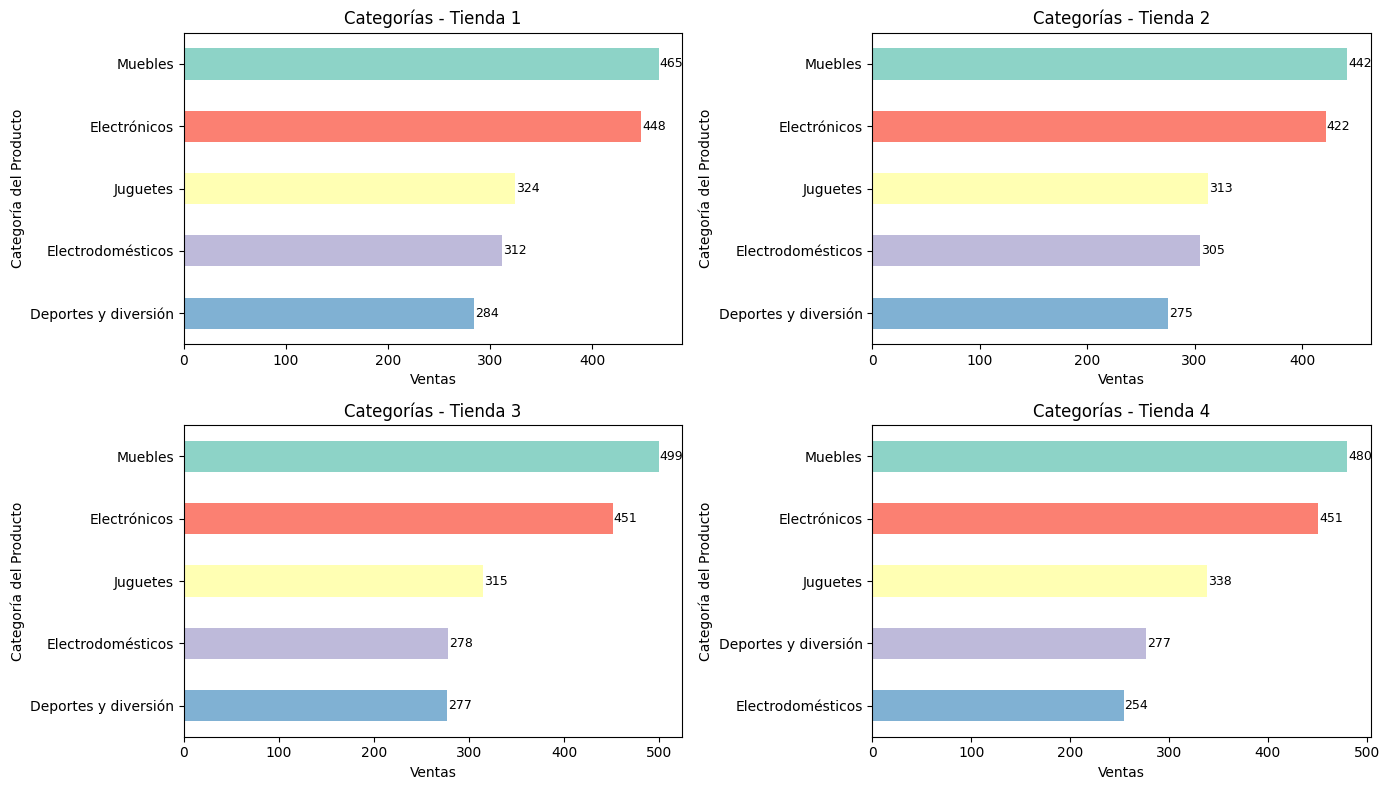

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 4 tiendas → 2x2
colors = ['#8DD3C7','#FB8072','#FFFFB3', '#BEBADA',  '#80B1D3']

for ax, (nombre, datos) in zip(axes.flatten(), categorias_por_tienda.items()):
    top_5 = datos.head(5)
    top_5.plot(kind='barh', ax=ax, color = colors[:len(top_5)])
    ax.set_title(f'Categorías - {nombre}')
    ax.set_xlabel('Ventas')
    ax.invert_yaxis()

    # Etiquetas con valores
    for i, (categoria, valor) in enumerate(top_5.items()):
        ax.text(valor + 1, i, str(valor), va='center', fontsize=9)

plt.tight_layout()
plt.show()




###Observación: Categorías más vendidas por tienda

El gráfico muestra las 5 categorías de productos más vendidas en cada una de las tiendas de Alura Store.

- En todas las tiendas, **Muebles** y **Electrónicos** lideran las ventas, ocupando los dos primeros lugares en cada local. Esto sugiere una demanda constante y generalizada por estos tipos de productos, lo cual podría estar relacionado con su valor o utilidad percibida.
- **Juguetes** ocupa el tercer lugar en las cuatro tiendas, consolidándose como una categoría con rotación significativa, aunque por debajo de Muebles y Electrónicos.
- Las categorías de menor volumen relativo son **Electrodomésticos** y **Deportes y diversión**, con ventas inferiores a 315 unidades en la mayoría de las tiendas.
- La **Tienda 3** presenta el mayor número de ventas de Muebles (499), seguida por Tienda 4 (480), lo que podría indicar mayor especialización o enfoque en esta categoría.

Se sugiere guiar decisiones sobre inventario, promociones o incluso especialización de tiendas, favoreciendo las categorías con mayor aceptación según el comportamiento de cada local.


##Métrica: Top 3 Ventas por tienda por Categoría

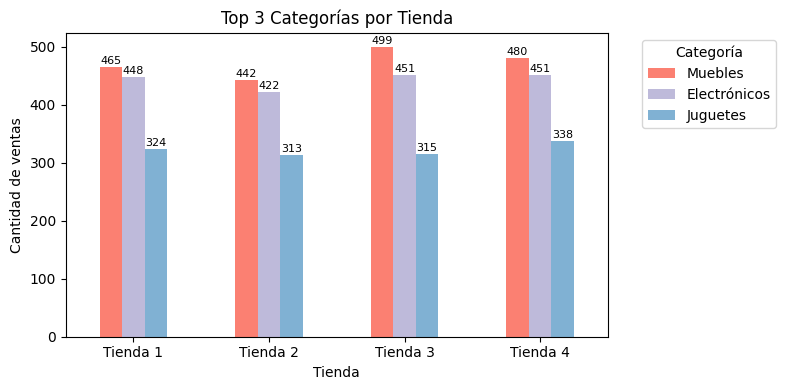

In [23]:
#agrupación
ax = df_top_categorias.plot(kind='bar', figsize=(8, 4), color=['#FB8072', '#BEBADA', '#80B1D3'])

plt.title('Top 3 Categorías por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

#etiquetas
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.tight_layout()
plt.show()



###Observación: Top 3 Categorías por Tienda

El gráfico evidencia que las categorías de **Muebles**, **Electrónicos** y **Juguetes** son las más vendidas en todas las tiendas de Alura Store, con diferencias relevantes en magnitud por local.

- **Muebles** es consistentemente la categoría más vendida en cada tienda, con especial destaque en **Tienda 3 (499 unidades)** y **Tienda 4 (480 unidades)**. Esto sugiere que estos locales podrían estar más especializados o contar con una mejor estrategia de exhibición o promoción en esta categoría.
- **Electrónicos** mantiene una posición fuerte en segundo lugar, con un comportamiento prácticamente idéntico en Tienda 3 y Tienda 4 (**ambas con 451 unidades**), lo que indica una alta estandarización de demanda entre esos puntos de venta.
- **Juguetes**, si bien se mantiene en el tercer puesto en todas las tiendas, muestra una menor variabilidad y volumen general respecto a las dos categorías principales, con Tienda 4 liderando levemente en esta categoría (338 unidades).

Desde un enfoque estratégico, estas tendencias pueden orientar decisiones como:
- Potenciar el inventario y marketing en Muebles y Electrónicos.
- Evaluar oportunidades para posicionar mejor la categoría Juguetes en locales con menor rendimiento.
- Considerar redistribución de stock o campañas segmentadas por categoría según el comportamiento de cada tienda.


##Métrica: Calificación promedio por tienda

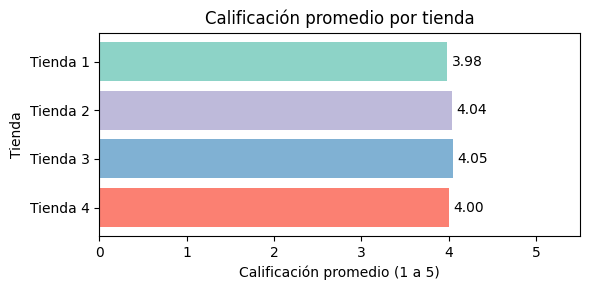

In [33]:
plt.figure(figsize=(6, 3))

bars = plt.barh(
    df_calificaciones.sort_index().index,
    df_calificaciones.sort_index()['Calificación Promedio'],
    color= ['#8DD3C7', '#BEBADA', '#80B1D3', '#FB8072']
)

plt.gca().invert_yaxis()

#etiquetas
for i, bar in enumerate(bars):
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval + 0.05, yval, f"{xval:.2f}", va='center', ha='left', fontsize=10)

plt.title('Calificación promedio por tienda')
plt.xlabel('Calificación promedio (1 a 5)')
plt.ylabel('Tienda')
plt.xlim(0, 5.5)
plt.tight_layout()
plt.show()




###Observación: Calificación promedio por tienda

El gráfico muestra la calificación promedio otorgada por los clientes a los productos vendidos en cada tienda.

- Las tiendas presentan **calificaciones bastante homogéneas**, todas dentro del rango de **3.98 a 4.05**, lo que sugiere un nivel de satisfacción generalizado.
- **Tienda 3** lidera levemente con un promedio de **4.05**, lo que podría reflejar una mejor atención al cliente, mayor calidad percibida de los productos o una experiencia de compra más satisfactoria.
- **Tienda 1**, aunque con una diferencia marginal, se posiciona en último lugar con una calificación promedio de **3.98**, lo que podría indicar oportunidad de mejora en aspectos como atención postventa, presentación de productos o experiencia en tienda.

Esta métrica debe considerarse junto con el volumen de ventas y tipos de productos ofrecidos, ya que una calificación ligeramente menor en una tienda con mayor flujo puede tener un impacto mayor en la percepción general de la marca.


##Métrica: Producto mejor valorado por tienda

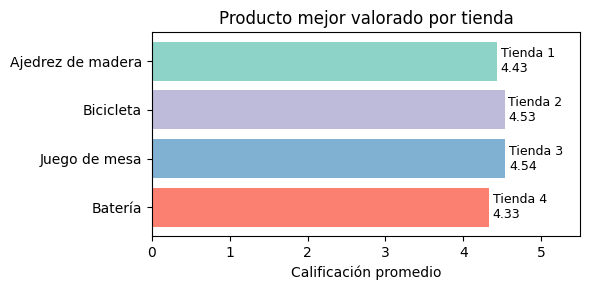

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

plt.gca().invert_yaxis()

# Crear gráfico horizontal
bars = plt.barh(df_mejor_valorados['Producto'], df_mejor_valorados['Calificación Promedio'], color= ['#8DD3C7', '#BEBADA', '#80B1D3', '#FB8072'])

# Añadir etiquetas: Tienda + calificación
for i, bar in enumerate(bars):
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    texto = f"{df_mejor_valorados['Tienda'].iloc[i]}\n{round(xval, 2)}"
    plt.text(xval + 0.05, yval, texto, va='center', ha='left', fontsize=9)

# Configuración del gráfico
plt.title('Producto mejor valorado por tienda')
plt.xlabel('Calificación promedio')
plt.xlim(0, 5.5)
plt.tight_layout()
plt.show()


##Métrica: Productos más y menos vendidos por tienda

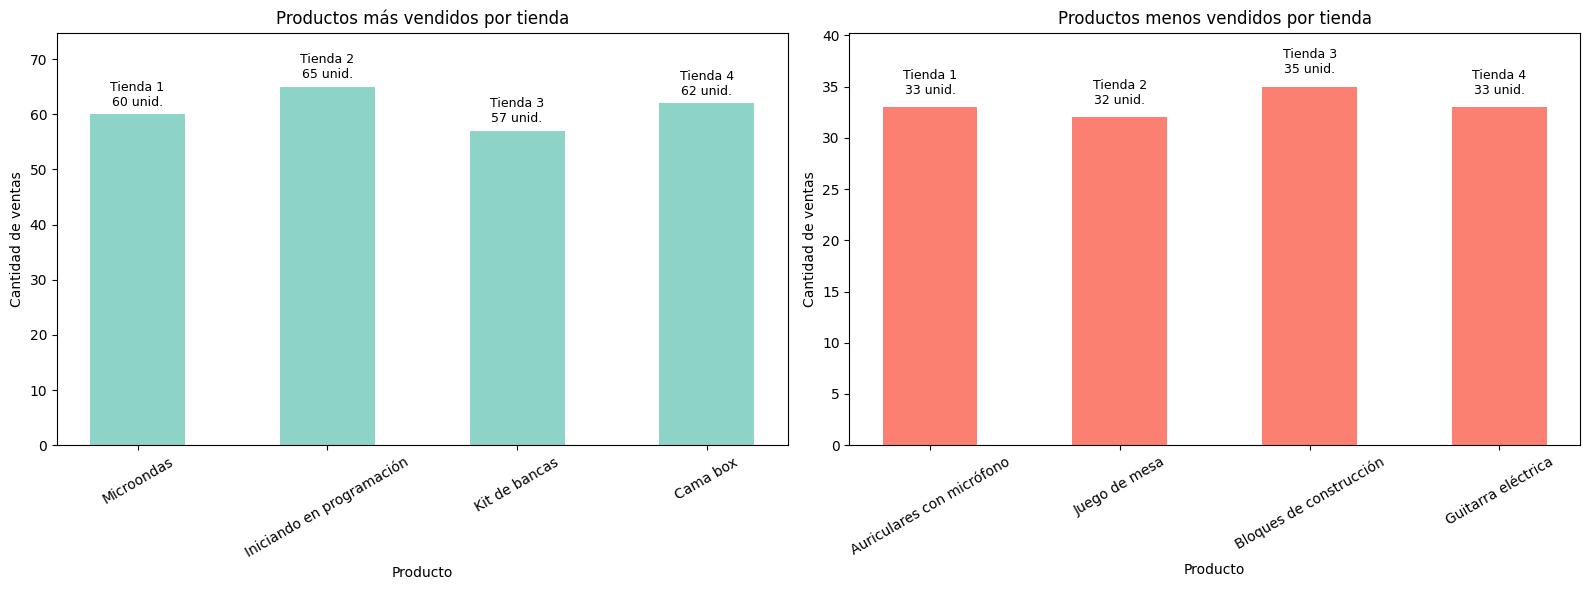

In [25]:
df_mas = df_mas.sort_values(by='Tienda')
df_menos = df_menos.sort_values(by='Tienda')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Gráfico 1: Productos mas vendidos

bars1 = axes[0].bar(df_mas['Producto'], df_mas['Ventas'], color='#8DD3C7', width=0.5)

for i, bar in enumerate(bars1):
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    texto = f"{df_mas['Tienda'].iloc[i]}\n{int(yval)} unid."
    axes[0].text(xval, yval + 1, texto, ha='center', va='bottom', fontsize=9)

axes[0].set_ylim(0, df_mas['Ventas'].max() * 1.15)
axes[0].set_title('Productos más vendidos por tienda')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Cantidad de ventas')
axes[0].tick_params(axis='x', rotation=30)

#Gráfico 2: Productos menos vendidos
bars2 = axes[1].bar(df_menos['Producto'], df_menos['Ventas'], color='#FB8072', width=0.5)

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    texto = f"{df_menos['Tienda'].iloc[i]}\n{int(yval)} unid."
    axes[1].text(xval, yval + 1, texto, ha='center', va='bottom', fontsize=9)

axes[1].set_ylim(0, df_menos['Ventas'].max() * 1.15)
axes[1].set_title('Productos menos vendidos por tienda')
axes[1].set_xlabel('Producto')
axes[1].set_ylabel('Cantidad de ventas')
axes[1].tick_params(axis='x', rotation=30)

# Ajustar espacio
plt.tight_layout()
plt.show()

###Observación: Productos más y menos vendidos por tienda

Este análisis muestra los productos con mayor y menor volumen de ventas en cada tienda de Alura Store.

- **Tienda 2** destaca como la tienda con el producto más vendido, con **65 unidades** del producto **"Iniciando en programación"**, seguido por Tienda 4 con **"Cama box"** (62 unidades).
- **Tienda 3** tiene el producto más vendido con menor volumen en comparación con las otras tiendas (**"Kit de bancas"**, 57 unidades), lo que puede reflejar una menor rotación de productos estrella.
- En cuanto a los productos menos vendidos, todas las tiendas presentan **volúmenes similares entre 32 y 35 unidades**, lo que sugiere una estabilidad en los artículos con baja demanda.

Estos datos permiten identificar los productos que generan mayor tracción comercial en cada tienda, así como aquellos que podrían ser descontinuados o reemplazados por artículos de mayor rotación.


##Métrica: Costo envío promedio por tienda

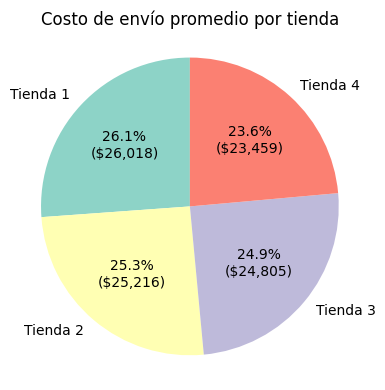

In [14]:
plt.figure(figsize=(4, 4))
plt.pie(
    df_envio['Costo de Envío Promedio'],
    labels=df_envio.index,
    autopct=lambda p: f'{p:.1f}%\n(${int(p * df_envio["Costo de Envío Promedio"].sum() / 100):,})',
    startangle=90,
    colors=plt.cm.Set3.colors
)

plt.title('Costo de envío promedio por tienda')
plt.axis('equal')  # Mantener forma circular
plt.tight_layout()
plt.show()

###Observación: Costo de envío promedio por tienda

El gráfico circular presenta la distribución del costo de envío promedio entre las cuatro tiendas de Alura Store.

**Tienda 1** lidera con el mayor costo de envío promedio, representando el **26.1% del total**, equivalente a **$26,018**.

Esto puede estar asociado a distancias logísticas mayores, menor eficiencia en procesos de distribución o tarifas más elevadas con proveedores.
**Tienda 2** y **Tienda 3** mantienen costos similares, con un **25.3%** y **24.9%** respectivamente, mostrando un equilibrio en su estrategia de despacho.
**Tienda 4**, con el menor costo promedio (**$23,459**, 23.6%), podría estar beneficiándose de una mejor optimización de rutas, convenios logísticos o cercanía geográfica a los puntos de entrega.

Este análisis es relevante para identificar oportunidades de mejora en costos operativos. Tiendas con costos desproporcionados podrían requerir revisión en sus procesos de abastecimiento, negociación con transportistas o en su modelo de entregas.


#Recomendación final

##Informe final de análisis

Durante este análisis se abordaron en profundidad las métricas clave de desempeño para las cuatro tiendas de Alura Store: ingresos, calificaciones de los clientes, desempeño en ventas por categoría y producto, y costos operativos asociados al envío.

A través de visualizaciones comparativas y observaciones detalladas, se pudo observar que:

- **Tienda 3 y Tienda 2** presentan un equilibrio saludable entre rentabilidad, satisfacción del cliente y eficiencia logística.
- **Tienda 1**, aunque con altos ingresos, muestra debilidades en satisfacción y costos logísticos elevados.
- **Tienda 4**, en contraste, se posiciona consistentemente por debajo del promedio en ingresos, valoración de productos y volumen de ventas.

---

## Recomendación final

Considerando que el Sr. Juan busca vender una tienda para iniciar un nuevo emprendimiento, la decisión debe centrarse en minimizar el impacto sobre el negocio principal y liberar capital de una unidad con bajo retorno.

Por tanto, se recomienda **vender Tienda 4**, ya que:

- Es la tienda con el **menor ingreso total**.
- Su producto mejor valorado no destaca en comparación con las otras tiendas.
- No muestra ventajas competitivas relevantes en satisfacción ni en volumen de ventas.
- A pesar de tener el **costo de envío más bajo**, esto **no compensa su bajo rendimiento general**.

Con esta decisión, el Sr. Juan podrá avanzar en su nuevo emprendimiento sin comprometer las operaciones más exitosas de su cadena de tiendas.
